# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [43]:
! pip install citipy 

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [44]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [45]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naron
Processing Record 2 of Set 1 | panguna
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | yumen
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | mount isa
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | nelson bay
Processing Record 13 of Set 1 | arraial do cabo
Processing Record 14 of Set 1 | klaksvik
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | sinnamary
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | new norfolk
Processing Record 22 of Set 1 | pro

In [50]:
# Converting the cities weather data into a pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Showing the Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [51]:
# Displaying the sample data using the head() function
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,naron,43.5167,-8.1528,289.62,70,100,2.98,ES,1670423173
1,panguna,-6.3164,155.4848,293.10,96,90,0.79,PG,1670423173
2,ribeira grande,38.5167,-28.7000,288.02,82,40,12.35,PT,1670423174
3,hilo,19.7297,-155.0900,295.53,92,75,2.57,US,1670423174
4,yumen,40.2833,97.2000,264.22,81,100,2.22,CN,1670423174


In [52]:
# Exporting the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naron,43.5167,-8.1528,289.62,70,100,2.98,ES,1670423173
1,panguna,-6.3164,155.4848,293.10,96,90,0.79,PG,1670423173
2,ribeira grande,38.5167,-28.7000,288.02,82,40,12.35,PT,1670423174
3,hilo,19.7297,-155.0900,295.53,92,75,2.57,US,1670423174
4,yumen,40.2833,97.2000,264.22,81,100,2.22,CN,1670423174


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

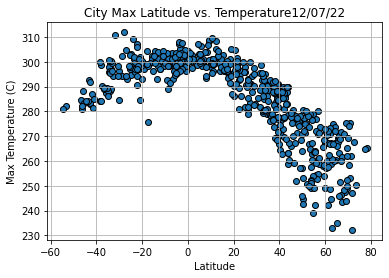

In [54]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = 'o', color = 'tab:blue', edgecolors='black')

# Adding title to the plot
plt.title("City Max Latitude vs. Temperature" + time.strftime("%x"))

# Adding axes titles to the plot
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Adding gridlines to the plot
plt.grid(True)

# Saving the figure
plt.savefig("output_data/Fig1.png")

# Displaying the plot
plt.show()

#### Latitude Vs. Humidity

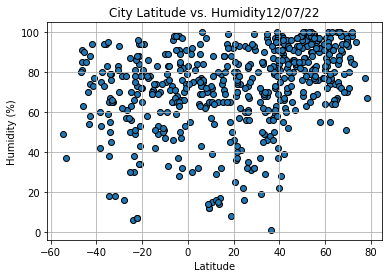

In [55]:
# Building the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = 'o', color = 'tab:blue', edgecolors='black')

# Adding title to the plot
plt.title("City Latitude vs. Humidity" + time.strftime("%x"))

# Adding axes titles to the plot
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding gridlines to the plot
plt.grid(True)

# Saving the figure into the "output_data" folder
plt.savefig("output_data/Fig2.png")

# Displaying the plot
plt.show()

#### Latitude Vs. Cloudiness

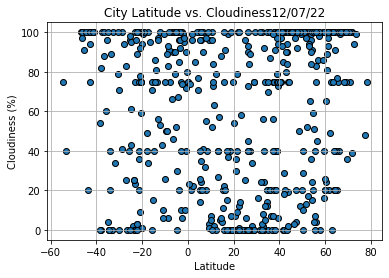

In [56]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = 'o', color = 'tab:blue', edgecolors='black')

# Adding title to the plot
plt.title("City Latitude vs. Cloudiness" + time.strftime("%x"))

# Adding axes titles to the plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding gridlines to the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

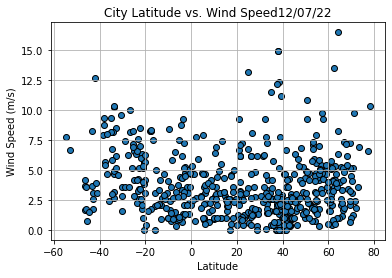

In [57]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = 'o', color = 'tab:blue', edgecolors='black')

# Adding title to the plot
plt.title("City Latitude vs. Wind Speed" + time.strftime("%x"))

# Adding axes titles to the plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Adding gridlines to the plot
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [58]:
# Creating a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0,:]

# Displaying the sample data using the head() function
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,naron,43.5167,-8.1528,289.62,70,100,2.98,ES,1670423173
2,ribeira grande,38.5167,-28.7000,288.02,82,40,12.35,PT,1670423174
3,hilo,19.7297,-155.0900,295.53,92,75,2.57,US,1670423174
4,yumen,40.2833,97.2000,264.22,81,100,2.22,CN,1670423174
5,chokurdakh,70.6333,147.9167,253.11,99,100,1.22,RU,1670423174


In [59]:
# Creating a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0,:]

# Displaying the sample data using the head() function
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,panguna,-6.3164,155.4848,293.10,96,90,0.79,PG,1670423173
6,mount isa,-20.7333,139.5000,300.02,34,9,0.00,AU,1670423175
7,puerto ayora,-0.7393,-90.3518,296.13,91,72,2.24,EC,1670423175
8,punta arenas,-53.1500,-70.9167,282.21,37,40,6.69,CL,1670422887
9,ushuaia,-54.8000,-68.3000,280.94,49,75,7.72,AR,1670423175


###  Temperature vs. Latitude Linear Regression Plot

The correlation between latitude and maximum temperature is -0.86
The linear regression equation is y=-0.75x+308.99


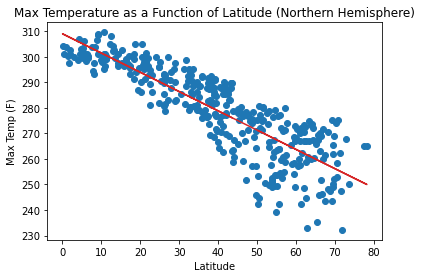

r-squared = 0.736


In [83]:
# Calculating the correlation coefficient for latitude and maximum temperature on Northern Hemisphere
corr = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and maximum temperature is" + " " + str(corr_coeff))

# Linear regression model on Northern Hemisphere
slope, intercept, r, p, se = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
r_values = northern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],color='tab:blue')
plt.plot(northern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Adding the title on the final plot
plt.title("Max Temperature as a Function of Latitude (Northern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

The correlation between latitude and maximum temperature is 0.6
The linear regression equation is y=0.3x+303.02


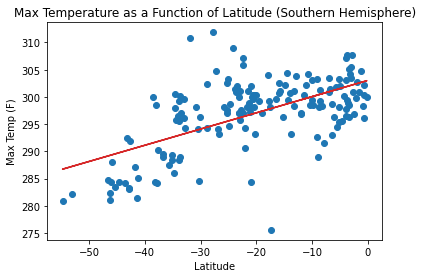

r-squared = 0.366


In [82]:
# Calculating the correlation coefficient for latitude and maximum temperature on Southern Hemisphere
corr = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and maximum temperature is" + " " + str(corr_coeff))

# Linear regression model on Southern Hemisphere
slope, intercept, r, p, se = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
r_values = southern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],color='tab:blue')
plt.plot(southern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

# Adding the title on the final plot
plt.title("Max Temperature as a Function of Latitude (Southern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

**Discussion about the linear relationship:** 
- **Northern Hemisphere:** We see an inversely proportional relationship between maximum temperature and latitude. That is, as we move further north away from the equator, the smaller the maximum temperature value is.
- **Southern Hemisphere:** We see a directly proportional relationship between maximum temperature and latitude. That is, as we move further towards the equator, the larger the maximum temperature value is.


### Humidity vs. Latitude Linear Regression Plot

The correlation between latitude and humidity is  0.4
The linear regression equation isy=0.43x+58.6


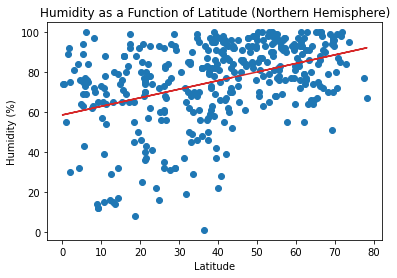

r-squared = 0.163


In [81]:
# Calculating the correlation coefficient for latitude and humidity on Northern Hemisphere
corr = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and humidity is " + " " + str(corr_coeff))

# Linear regression model on Northern Hemisphere
slope, intercept, r, p, se = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
r_values = northern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is" + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],color='tab:blue')
plt.plot(northern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding the title on the final plot
plt.title("Humidity as a Function of Latitude (Northern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

The correlation between latitude and humidity is 0.05
The linear regression equation is y=0.08x+69.05


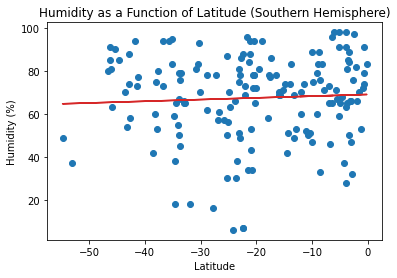

r-squared = 0.003


In [80]:
# Calculating the correlation coefficient for latitude and maximum temperature on Southern Hemisphere
corr = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and humidity is" + " " + str(corr_coeff))

# Linear regression model on Southern Hemisphere
slope, intercept, r, p, se = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
r_values = southern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],color='tab:blue')
plt.plot(southern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Adding the title on the final plot
plt.title("Humidity as a Function of Latitude (Southern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

**Discussion about the linear relationship:**
- **Nothern Hemisphere:** We see a directly proportional relationship between humidity and latitude. That is, as we move away from the equator in the northern direction, the humidity increases. 
- **Southern Hemisphere:** We see a directly proportional relationship between humidity and latitude, however, less pronounced than we saw in the Northern Hemisphere given the smaller slope. That is, as we move twoards the equator, the humidity also slightly increases.

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between latitude and cloudiness is 0.33
The linear regression equation is y=0.68x+34.03


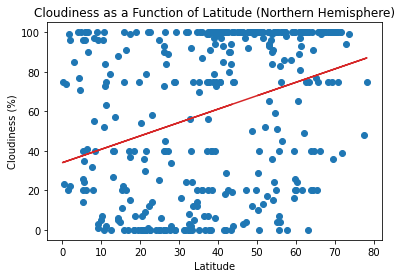

r-squared = 0.11


In [79]:
# Calculating the correlation coefficient for latitude and cloudiness on Northern Hemisphere
corr = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and cloudiness is" + " " + str(corr_coeff))

# Linear regression model on Northern Hemisphere
slope, intercept, r, p, se = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
r_values = northern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],color='tab:blue')
plt.plot(northern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding the title on the final plot
plt.title("Cloudiness as a Function of Latitude (Northern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

The correlation between latitude and cloudiness is 0.08
The linear regression equation is y=0.22x+66.52


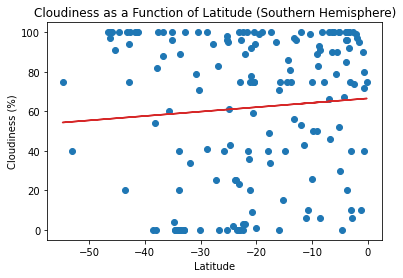

r-squared = 0.007


In [78]:
# Calculating the correlation coefficient for latitude and cloudiness on Southern Hemisphere
corr = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and cloudiness is" + " " + str(corr_coeff))

# Linear regression model on Southern Hemisphere
slope, intercept, r, p, se = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
r_values = southern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],color='tab:blue')
plt.plot(southern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Adding the title on the final plot
plt.title("Cloudiness as a Function of Latitude (Southern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

**Discussion about the linear relationship:** 
- **Nothern Hemisphere:** We see a directly proportional relationship between cloudiness and latitude. That is, as we move away from the equator in the northern direction, the cloudiness increases. 
- **Southern Hemisphere:** We see a directly proportional relationship between cloudiness and latitude, however, less pronounced than we saw in the Northern Hemisphere given the smaller slope. That is, as we move twoards the equator, the cloudiness also slightly increases.

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between latitude and wind speed is 0.14
The linear regression equation is y=0.02x+2.71


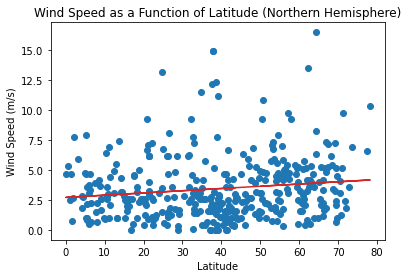

r-squared = 0.019


In [77]:
# Calculating the correlation coefficient for latitude and wind speed on Northern Hemisphere
corr = st.pearsonr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and wind speed is" + " " + str(corr_coeff))

# Linear regression model on Northern Hemisphere
slope, intercept, r, p, se = st.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
r_values = northern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],color='tab:blue')
plt.plot(northern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Adding the title on the final plot
plt.title("Wind Speed as a Function of Latitude (Northern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

The correlation between latitude and wind speed is -0.31
The linear regression equation is y=-0.06x+3.13


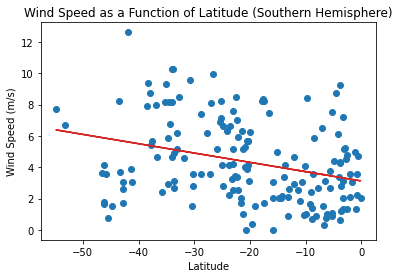

r-squared = 0.095


In [76]:
# Calculating the correlation coefficient for latitude and wind speed on Southern Hemisphere
corr = st.pearsonr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
corr_coeff = round(corr[0],2)
print("The correlation between latitude and wind speed is" + " " + str(corr_coeff))

# Linear regression model on Southern Hemisphere
slope, intercept, r, p, se = st.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
r_values = southern_hemi_df["Lat"]*slope + intercept
lin_eq = "y=" + str(round(slope,2)) + "x+" + str(round(intercept,2))
print("The linear regression equation is " + str(lin_eq))

# Generating the scatter plot and fitting line of best fit via linear regression
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],color='tab:blue')
plt.plot(southern_hemi_df["Lat"], r_values, color='tab:red')

# Labelling the x-axis and y-axis of the final plot, respectively
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Adding the title on the final plot
plt.title("Wind Speed as a Function of Latitude (Southern Hemisphere)")

# Displaying the final plot
plt.show()

# Printing the model's r-squared value
print(f"r-squared = {round(r**2,3)}")

**Discussion about the linear relationship:** 
- **Nothern Hemisphere:** We see a directly proportional relationship between wind speed and latitude. That is, as we move away from the equator in the northern direction, the wind speed also steadily increases. 
- **Southern Hemisphere:** We see an inversely proportional relationship between wind speed and latitude. That is, as we move twoards the equator, the wind speed decreases. 